<h1>Project 2: Org Chart and Site Visits</h1>

<h3> DATA 620 Web Analytics, CUNY Spring 2018 </h3>

Team: Andy Carson, Nathan Cooper, Walt Wells

Video: https://github.com/wwells/CUNY_DATA_620_GROUP/blob/master/Project_2/Project2.mp4

<h2>Assignment Details</h2>

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3. What can you infer about each of the distinct groups?

You may work in a small group on the project.  Your code and analysis should be delivered in an IPython Notebook by end of day Monday July 2nd. 


<h2>Solution</h2>

The data comes from anonomized org chart data (User = user1 -> Manager = user2 means that user1 reports to user2) and anonomized internal Sharepoint site visit data within that org for a period of a week in recent history (user1 -> site1 -> count = 10 means that user1 visited site1 10 times in the week period under analysis).


In [85]:
import networkx as nx #note: this is version 2.1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite as bi
import math

plt.figure(figsize = (17,8))
% matplotlib inline

<h2>Org Chart</h2>

In [86]:
#read in the edge data
edges = pd.read_csv("C:/Users/Andy/Desktop/Personal/Learning/CUNY/DATA620/Project2/edges_anon.csv")

In [87]:
edges.head(5)

,User,Manager
0,User13,User40
1,User72,User36
2,User171,User172
3,User128,User36
4,User89,User25


In [88]:
#read in nodes
nodes = pd.read_csv("C:/Users/Andy/Desktop/Personal/Learning/CUNY/DATA620/Project2/nodes_anon.csv")

In [89]:
nodes.head(5)

,User
0,User1
1,User2
2,User3
3,User4
4,User5


In [90]:
#make graph
g = nx.Graph(name = "Org")

In [91]:
node_values = list(nodes.User.values)

In [92]:
g.add_nodes_from(node_values)

In [93]:
subset = edges[['User', 'Manager']]
edges_tuples = [tuple(x) for x in subset.values]

In [94]:
g.add_edges_from(edges_tuples)

One can see in the graph below that the org centers around a single individual (the top manager), with managers that report to the top manager, with many team members that report to these managers.

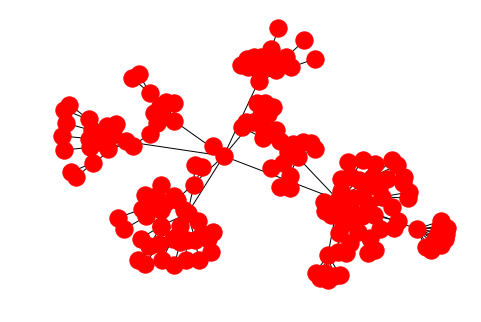

In [95]:
nx.draw_spring(g, with_labels = False)

The graph has 174 nodes with 173 edges (which makes sense since it consists of a user reporting to another user).  There is a low degree as most users only have 1 connection (their boss).

In [96]:
print nx.info(g)
print "Diameter: " + str(nx.diameter(g))

Name: Org
Type: Graph
Number of nodes: 174
Number of edges: 173
Average degree:   1.9885
Diameter: 7


<h3>Degree Centrality</h3>

In [97]:
degree = nx.degree(g)
degree = dict(list(degree))

The least degree is 1 (a user reports to their boss and has no direct reports) while the most degree is 25 (a user has 25 direct reports).

In [98]:
print min(degree.values()) #min = 1
print max(degree.values() ) #max = 25

1
25


In [99]:
sort_degree = sorted(degree.iteritems(), key=lambda(k,v): (-v,k))

The users with highest degreees are the managers with lots of team members. The top manager (User61) is actually further down the list.

In [100]:
sort_degree[0:10]

[('User36', 25),
 ('User40', 14),
 ('User130', 13),
 ('User172', 13),
 ('User68', 12),
 ('User18', 11),
 ('User38', 9),
 ('User147', 8),
 ('User61', 8),
 ('User73', 7)]

<h3>Closeness:</h3>

The top manager has the highest closeness, which makes sense becuase the top manager is centrally located.  The managers also have high closeness.

In [101]:
#closeness
closeness = nx.closeness_centrality(g)
sorted(closeness.iteritems(), key=lambda(k,v): (-v,k))[0:5]

[('User61', 0.4013921113689095),
 ('User36', 0.3887640449438202),
 ('User172', 0.3117117117117117),
 ('User130', 0.30619469026548674),
 ('User40', 0.30297723292469353)]

<h3>Betweenness:</h3>

The top manager has the highest betweenness, which makes sense becuase the top manager is between everybody.  Again, the managers also have high betweenness.

In [102]:
#betweenness
betweenness = nx.betweenness_centrality(g)
sorted(betweenness.iteritems(), key=lambda(k,v): (-v,k))[0:5]

[('User61', 0.7351794596047856),
 ('User36', 0.6871219249899181),
 ('User172', 0.25796478021239416),
 ('User130', 0.20755477886812745),
 ('User18', 0.19706949858851996)]

<h3>Eigenvector:</h3>

The top manager does not have the highest eigenvector centrality.  Instead, the manager of the largest team does, followed by a member of that team, and then the top manager.  

In [103]:
#eigenvector
eigenvector = nx.eigenvector_centrality(g)
sorted(eigenvector.iteritems(), key=lambda(k,v): (-v,k))[0:5]

[('User36', 0.6542193722368647),
 ('User68', 0.20471767410584743),
 ('User61', 0.1978171933911666),
 ('User18', 0.19663327611537182),
 ('User73', 0.1579175931093775)]

<h3>Pagerank</h3>

Pagerank is similar to other measures: the manager of the largest team has the highest pagerank.  The top manager is at number 10 in rank.

In [104]:
#pagerank
pagerank = nx.pagerank(g)
sorted(pagerank.iteritems(), key=lambda(k,v): (-v,k))[0:5]

[('User36', 0.06125467895017438),
 ('User40', 0.03682595049252272),
 ('User130', 0.03351155094877772),
 ('User172', 0.032701161082685254),
 ('User68', 0.0325831910671019)]

<h2>Site Data</h2>

Does the org chart mirror the interactions of users with certain sites?  Could we infer the org chart based on the site usage?  Do members of the same team use hte same sites?

In [105]:
#########################
#get site data
#########################
sites = pd.read_csv("C:/Users/Andy/Desktop/Personal/Learning/CUNY/DATA620/Project2/sites_anon.csv")

In [106]:
sites.head(10)

,User,Site,Count
0,User1,NaN,79
1,User10,NaN,35
2,User11,NaN,52
3,User12,NaN,30
4,User123,NaN,29
5,User124,NaN,32
6,User125,NaN,174
7,User126,NaN,45
8,User127,NaN,15
9,User129,NaN,31


In [107]:
sites.count()

User     1131
Site     1044
Count    1131
dtype: int64

In [108]:
#remove missing sites
sites_clean = sites[sites.Site.isna()!=True]

In [109]:
sites_clean.count()

User     1044
Site     1044
Count    1044
dtype: int64

In [110]:
#make graph
s = nx.Graph(name = "Sites")

In [111]:
#get nodes-users and sites
node_values = list(sites_clean.User.values) + list(sites_clean.Site.values)

In [112]:
s.add_nodes_from(node_values) 

In [113]:
#get edges
subset = sites_clean[['User', 'Site','Count']]
edges_tuples = [tuple(x) for x in subset.values]

In [114]:
s.add_weighted_edges_from(edges_tuples)

In [115]:
#weight the data for edge width and coloring.  Code borrowed and modified from SNA.
weights = [float(edata['weight']) for f, t, edata in s.edges(data=True)]

When we generate the graph of users to sites, we get a "hairball".  Interestingly, we do see that there is a user, site cluster that is not connected to anything else.  No other user connected to that site.  This was Site132 and User153.  Looking at the actual site information, there is nothing suspicious about the site, but it is a bit odd that nobody else has viewed the site.

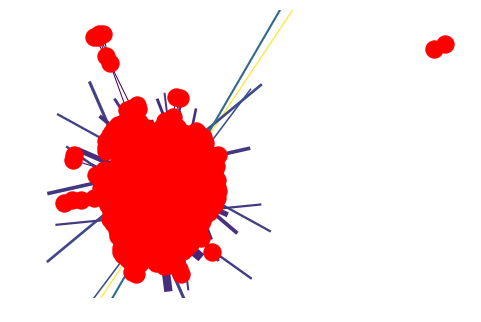

In [116]:
nx.draw_spring(s, with_labels=False, width = weights, edge_color = weights)

<h3> Projected Graph: User </h3>

Let's create a projected graph on the users.  That is, if two users view the same site, then we make a connection between them.

In [117]:
################
#user graph
#################
#https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.bipartite.projection.weighted_projected_graph.html
user_graph = bi.weighted_projected_graph(s, list(sites_clean.User.values), ratio=False)

In [118]:
user_graph.number_of_edges()

2963

In [119]:
user_graph.number_of_nodes()

91

In [120]:
def centrality_measures(g):
    degree = nx.degree(g)
    degree = dict(list(degree))
    sort_degree = sorted(degree.iteritems(), key=lambda(k,v): (-v,k))
    print "Degree:"
    print sort_degree[0:5]
    print
    
    closeness = nx.closeness_centrality(g)
    print "Closeness:"
    print sorted(closeness.iteritems(), key=lambda(k,v): (-v,k))[0:5]
    print
    
    betweenness = nx.betweenness_centrality(g)
    print "Betweenness:"
    print sorted(betweenness.iteritems(), key=lambda(k,v): (-v,k))[0:5]
    print
    
    eigenvector = nx.eigenvector_centrality(g)
    print "Eigenvector:"
    print sorted(eigenvector.iteritems(), key=lambda(k,v): (-v,k))[0:5]
    print
    
    pagerank = nx.pagerank(g)
    print "Pagerank:"
    print sorted(pagerank.iteritems(), key=lambda(k,v): (-v,k))[0:5]

We see that User69 scores well in each of these centrality measures, even though the user is not central in the formal org hierarchy.  User68 also scores well and is centrally located formally speaking.

In [121]:
centrality_measures(user_graph)

Degree:
[('User69', 84), ('User174', 83), ('User43', 83), ('User52', 83), ('User68', 83)]

Closeness:
[('User69', 0.9362884160756502), ('User174', 0.9264327485380117), ('User43', 0.9264327485380117), ('User52', 0.9264327485380117), ('User68', 0.9264327485380117)]

Betweenness:
[('User11', 0.0225973609257354), ('User68', 0.01325650193309497), ('User12', 0.010318944911062085), ('User69', 0.008962374657567327), ('User174', 0.008427425284555364)]

Eigenvector:
[('User69', 0.1222605200182892), ('User43', 0.12210153276405195), ('User52', 0.12210153276405195), ('User72', 0.12210153276405195), ('User174', 0.12199984575521289)]

Pagerank:
[('User51', 0.021130340224119654), ('User52', 0.020514525380577554), ('User35', 0.01899018837327904), ('User69', 0.018914126465192586), ('User172', 0.018809656322670464)]


In [122]:
weights_user_graph = [float(edata['weight']) for f, t, edata in user_graph.edges(data=True)]

Again, we can see that user153 is in a cluster all alone.

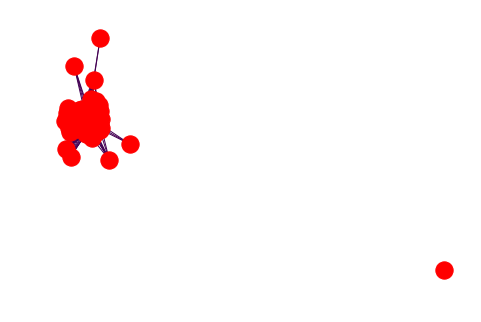

In [123]:
nx.draw_spring(user_graph, width=weights_user_graph, edge_color=weights_user_graph, with_labels=False)

<h3> Projected Graph: Site </h3>

Let's create a projected graph on the sites.  That is, if two sites are viewed by the same user, then we make a connection between the sites.

In [124]:
################
## sites
##############
site_graph = bi.weighted_projected_graph(s, list(sites_clean.Site.values), ratio=False)

In [125]:
site_graph = list(nx.connected_component_subgraphs(site_graph))[0]

In [126]:
site_graph.number_of_edges()

9025

In [127]:
site_graph.number_of_nodes()

484

Clearly sites 426, 229, and 27 are important as they make up the top 3 in each centrality measure.

In [128]:
centrality_measures(site_graph)

Degree:
[('Site426', 440), ('Site229', 425), ('Site27', 410), ('Site240', 247), ('Site8', 229)]

Closeness:
[('Site426', 0.9182509505703422), ('Site229', 0.8927911275415896), ('Site27', 0.8609625668449198), ('Site240', 0.6717663421418637), ('Site8', 0.6509433962264151)]

Betweenness:
[('Site426', 0.2190796164226391), ('Site229', 0.2079584958691417), ('Site27', 0.15209113590854578), ('Site20', 0.05265023730197022), ('Site240', 0.04253309669127611)]

Eigenvector:
[('Site426', 0.19953610526741306), ('Site229', 0.19682918618106648), ('Site27', 0.19675372662857984), ('Site240', 0.15047550448985325), ('Site11', 0.14578055087293662)]

Pagerank:
[('Site426', 0.03634752469240277), ('Site229', 0.03493460491174804), ('Site27', 0.030142629954927856), ('Site8', 0.018365382275707293), ('Site20', 0.016958718622767738)]


In [129]:
weights_site_graph = [float(edata['weight']) for f, t, edata in site_graph.edges(data=True)]

We get another big "hairball".  We need to trim the edges and reduce the graph in someway.  We use the "island method" below to do so.

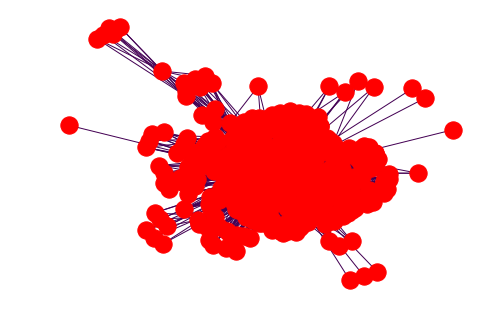

In [130]:
nx.draw_spring(site_graph, width=weights_site_graph, edge_color=weights_site_graph, with_labels=False)

<h3> Island Method</h3>

Let's pair down each of the projected graphs using the island method.

In [131]:
#####
## islands method
# taken from SNA chp 4 pg 64.  Modified appropriately.
########

def trim_edges(g, weight = 1):
    edges = []
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight']> weight:
            x = float(edata['weight'])
            edges.append((f,to,x))
    g2.add_weighted_edges_from(edges)
    return g2


def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    
    #size of step
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn, mx, step)]

In [132]:
#users
user_island = island_method(user_graph)

For the user graph, we see that we can reduce from 79, to 44, 12, to 4, to 2 nodes by increasing the weight threshold.  The graph oscilates between having 1 or 2 connected components.

In [133]:
print "Threshold, Nodes, Edges, Number of Connected Components"
for i in user_island:
    print i[0], nx.number_of_nodes(i[1]), nx.number_of_edges(i[1]), nx.number_connected_components(i[1])

Threshold, Nodes, Edges, Number of Connected Components
1 79 1840 1
4 44 196 2
7 12 12 1
10 4 2 2
13 2 1 1


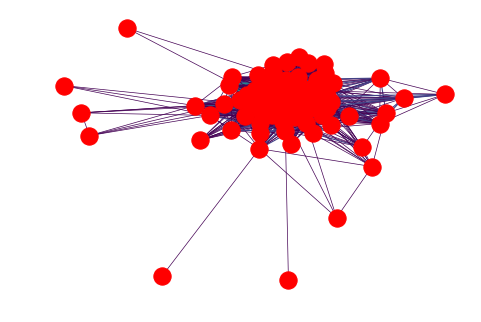

In [134]:
user_weights = [math.log(float(edata['weight'])) for f, t, edata in user_island[0][1].edges(data=True)]
nx.draw_spring(user_island[0][1], width=user_weights, edge_color=user_weights, with_labels=False)

We see that User124 and User 153 are alone in a cluster.

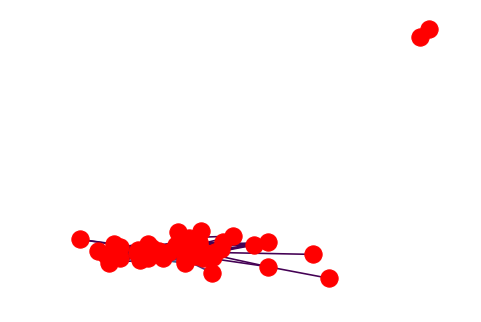

In [135]:
user_weights = [math.log(float(edata['weight'])) for f, t, edata in user_island[1][1].edges(data=True)]
nx.draw_spring(user_island[1][1], width=user_weights, edge_color=user_weights, with_labels=False)

Now we can see beyond the noise.  User52, User69, and User51 are central visually, and we recall that they all showed up in our centrality measures as well.  None of these users are central in the org though. This is not surprising as one would hardly expect managers and a top manager to be visiting lots of sharepoint sites and making connections that way.  Typically, those sites will be visited by team members.  User52 in particular is a boundary spanner, a bridge between teams, and likely a valuable resource in coordinating efforts/knowledge across teams.

The highest weight comes from User172 to User130 (weight = 16).  These two users work closely together, and both are central in the org. These are the users that survive to the end of our thresholding.

EdgeDataView([('User174', 'User131', {'weight': 8.0}), ('User174', 'User52', {'weight': 8.0}), ('User52', 'User69', {'weight': 8.0}), ('User52', 'User35', {'weight': 10.0}), ('User52', 'User51', {'weight': 8.0}), ('User172', 'User130', {'weight': 16.0}), ('User1', 'User35', {'weight': 13.0}), ('User130', 'User135', {'weight': 9.0}), ('User135', 'User51', {'weight': 8.0}), ('User69', 'User51', {'weight': 8.0}), ('User35', 'User16', {'weight': 9.0}), ('User35', 'User31', {'weight': 8.0})])

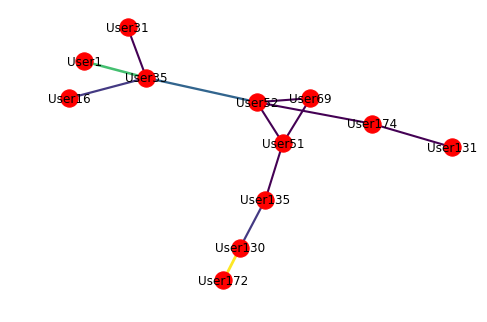

In [136]:
user_weights = [math.log(float(edata['weight'])) for f, t, edata in user_island[2][1].edges(data=True)]
nx.draw_spring(user_island[2][1], width=user_weights, edge_color=user_weights, with_labels=True)

#see data
user_island[2][1].edges(data=True)

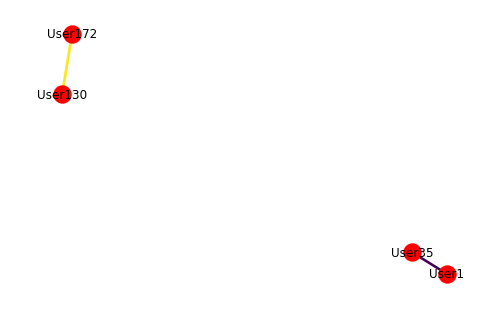

In [137]:
user_weights = [math.log(float(edata['weight'])) for f, t, edata in user_island[3][1].edges(data=True)]
nx.draw_spring(user_island[3][1], width=user_weights, edge_color=user_weights, with_labels=True)

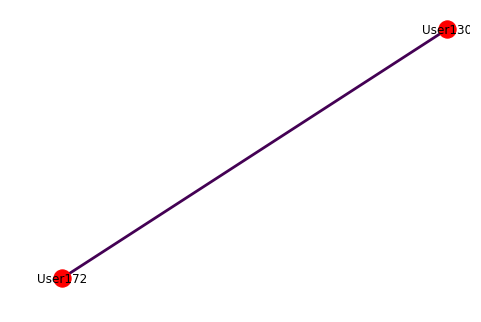

In [138]:
user_weights = [math.log(float(edata['weight'])) for f, t, edata in user_island[4][1].edges(data=True)]
nx.draw_spring(user_island[4][1], width=user_weights, edge_color=user_weights, with_labels=True)

What about the site connections?

In [139]:
## sites
site_island = island_method(site_graph)

For the site graph, we see that we can reduce from 120, to 9, 6, 3, 2, 2 nodes by increasing the weight threshold.  The graph always has 1 connected component.

In [140]:
print "Threshold, Nodes, Edges, Number of Connected Components"
for i in site_island:
    print i[0], nx.number_of_nodes(i[1]), nx.number_of_edges(i[1]), nx.number_connected_components(i[1])

Threshold, Nodes, Edges, Number of Connected Components
1 120 748 1
10 9 20 1
19 6 7 1
28 3 3 1
37 2 1 1
46 2 1 1


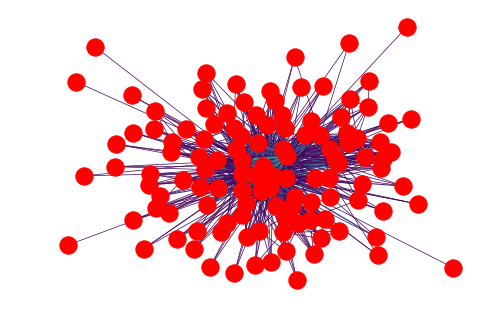

In [141]:
site_weights = [math.log(float(edata['weight'])) for f, t, edata in site_island[0][1].edges(data=True)]
nx.draw_spring(site_island[0][1], width=site_weights, edge_color=site_weights, with_labels=False)

The first iteration of the island method greatly reduces the noise, and we can see what the central sites are for this org.  Site426, Site27, and Site229 are the central nodes, which is what our centrality measures above showed us.  Unsurprisingly, these are the main sharepoint site, the sharepoint landing page, and the org's main sharepoint site.  These are the sites that remain to the end.

EdgeDataView([('Site229', 'Site8', {'weight': 25.0}), ('Site229', 'Site426', {'weight': 47.0}), ('Site229', 'Site27', {'weight': 34.0}), ('Site229', 'Site32', {'weight': 11.0}), ('Site229', 'Site20', {'weight': 17.0}), ('Site229', 'Site240', {'weight': 17.0}), ('Site229', 'Site128', {'weight': 14.0}), ('Site8', 'Site27', {'weight': 19.0}), ('Site8', 'Site426', {'weight': 27.0}), ('Site8', 'Site20', {'weight': 12.0}), ('Site9', 'Site426', {'weight': 11.0}), ('Site32', 'Site27', {'weight': 11.0}), ('Site32', 'Site426', {'weight': 14.0}), ('Site27', 'Site426', {'weight': 36.0}), ('Site27', 'Site20', {'weight': 16.0}), ('Site27', 'Site240', {'weight': 14.0}), ('Site426', 'Site20', {'weight': 20.0}), ('Site426', 'Site240', {'weight': 20.0}), ('Site426', 'Site128', {'weight': 17.0}), ('Site20', 'Site240', {'weight': 14.0})])

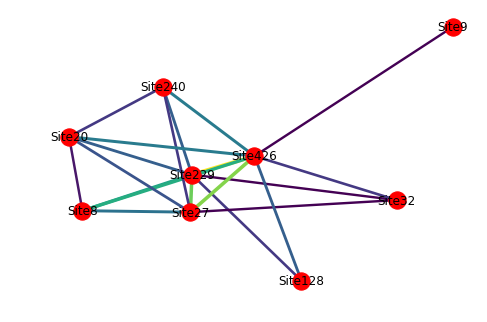

In [142]:
site_weights = [math.log(float(edata['weight'])) for f, t, edata in site_island[1][1].edges(data=True)]
nx.draw_spring(site_island[1][1], width=site_weights, edge_color=site_weights, with_labels=True)

#see data
site_island[1][1].edges(data=True)

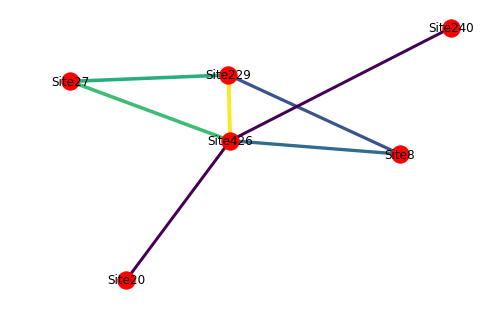

In [143]:
site_weights = [math.log(float(edata['weight'])) for f, t, edata in site_island[2][1].edges(data=True)]
nx.draw_spring(site_island[2][1], width=site_weights, edge_color=site_weights, with_labels=True)

EdgeDataView([('Site27', 'Site426', {'weight': 36.0}), ('Site27', 'Site229', {'weight': 34.0}), ('Site426', 'Site229', {'weight': 47.0})])

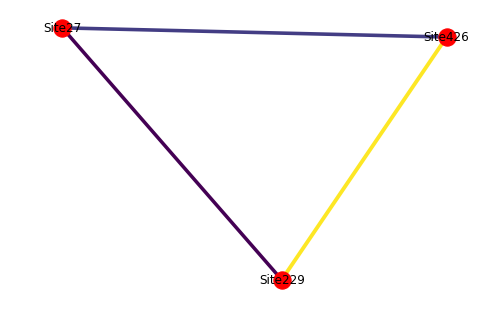

In [144]:
site_weights = [math.log(float(edata['weight'])) for f, t, edata in site_island[3][1].edges(data=True)]
nx.draw_spring(site_island[3][1], width=site_weights, edge_color=site_weights, with_labels=True)

site_island[3][1].edges(data=True)

EdgeDataView([('Site426', 'Site229', {'weight': 47.0})])

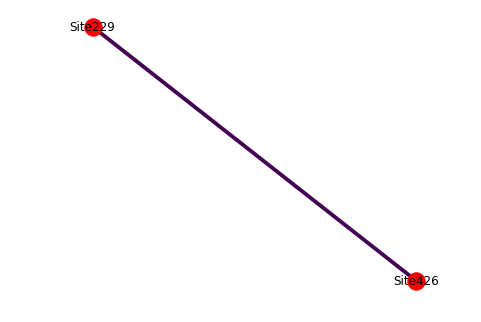

In [145]:
site_weights = [math.log(float(edata['weight'])) for f, t, edata in site_island[4][1].edges(data=True)]
nx.draw_spring(site_island[4][1], width=site_weights, edge_color=site_weights, with_labels=True)

site_island[4][1].edges(data=True)

<h2> Conclusion </h2>

What can we infer about the groups?  On the projected user graph side, there is a lot more variation, as different subsets of users use different sites.  We can see a little bit of org structure emerging from that usage.  We expect that if expanded to the company at large, different clusters would form around different individual orgs, as each org would use a particular subset of sharepoint sites related to their org.  Even within the org, members of the same team appear to use the same sites and so are connected both through the sites they use as well as formally through the org structure. However, site usage does not mean that one will be central to the org formally, as the power users are not those in management. But these users are important boundary spanners across teams.

On the site side, there is a lot of noise to begin with, but quickly the noise is paired down to a cluster of sites that are important to the org.  Unsurprisingly, the most central sites on this method are those that we would expect to be central: the landing page and the main site for the org.